In [2]:
# Libraries
from pathlib import Path
import pandas as pd
import numpy as np

import sys
sys.path.append('/people/jian449/KIM/src')
from kim.map import KIM
from kim.data import Data
from kim.mapping_model import MLP
from kim.utils import plot_sensitivity_mask, plot_sensitivity

import jax

%load_ext autoreload
%autoreload 2
%matplotlib inline 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Plotting parameters
# rc('text', usetex=False)
small_size = 15
medium_size = 25
bigger_size = 30
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)    # fontsize of the axes title
plt.rc('axes', labelsize=small_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=small_size)  # fontsize of the figure title
plt.rc('text', usetex = False)



# Read the perturbed data

In [23]:
# File and folder paths
dir_case = Path("/people/jian449/KIM/examples/im_cloudmodel")
dir_pert = dir_case / "data" / "PoissonPertb"
f_para = dir_pert / "Output.csv"
f_state = dir_pert / "Input_np_holodec.csv"
# f_state = dir_case / "data" / "Input_512.csv"
# f_para = dir_case / "data" / "Output_512.csv"

n_ens = 16
f_state_pert = [dir_pert / f"Input_{i}.csv" for i in range(1,n_ens+1)]

In [7]:
df_para = pd.read_csv(f_para)
df_state = pd.read_csv(f_state)
df_state_set = [pd.read_csv(f) for f in f_state_pert]

In [8]:
y_vars, x_vars = df_para.keys().to_list(), df_state.keys().to_list()
y, x = df_para.values, df_state.values

y_vars = ['$\lambda_w$', '$\log_{10}(\lambda_c)$']

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_31996/2923420360.py:4: SyntaxWarning: invalid escape sequence '\l'
  y_vars = ['$\lambda_w$', '$\log_{10}(\lambda_c)$']
/tmp/ipykernel_31996/2923420360.py:4: SyntaxWarning: invalid escape sequence '\l'
  y_vars = ['$\lambda_w$', '$\log_{10}(\lambda_c)$']


In [9]:
# f_state0 = dir_case / "data" / "Input_512.csv"
# f_para0 = dir_case / "data" / "Output_512.csv"
# df_para0, df_state0 = pd.read_csv(f_para0), pd.read_csv(f_state0)
# df_state0.head()

In [10]:
# f_state = dir_pert / "Input_np.csv"
# f_para = dir_pert / "Output.csv"
# df_para, df_state = pd.read_csv(f_para), pd.read_csv(f_state)
# df_state.head()

# Load the training results

In [12]:
# Load the sensitivity analysis result
label = 'mp-ss-wstd-both-t'
f_data_save = dir_case / f"results-holodec/Data-{label}"
data = Data(x, y)
data.load(f_data_save)

In [13]:
# Load the trained inverse mapping result
f_kim = dir_case / f"results-holodec/KIM-{label}"
kim = KIM(data, map_configs={}, mask_option="cond_sensitivity", map_option='many2one')
kim.load(f_kim)

# Predictions

In [ ]:
y_pert_set, y_m_set, y_m_w_set, y_std_w_set, w_set = [], [], [], [], []

for df_state in df_state_set:
    x_pert = df_state.values
    y_pert, y_m, y_m_w, y_std_w, w = kim.predict(x_pert)
    y_pert_set.append(y_pert)
    y_m_set.append(y_m)
    y_m_w_set.append(y_m_w)
    y_std_w_set.append(y_std_w)
    w_set.append(w)

y_pert_set = np.array(y_pert_set)
y_m_set = np.array(y_m_set)
y_m_w_set = np.array(y_m_w_set)
y_std_w_set = np.array(y_std_w_set)
w_set = np.array(w_set)


/tmp/ipykernel_31996/2696364503.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


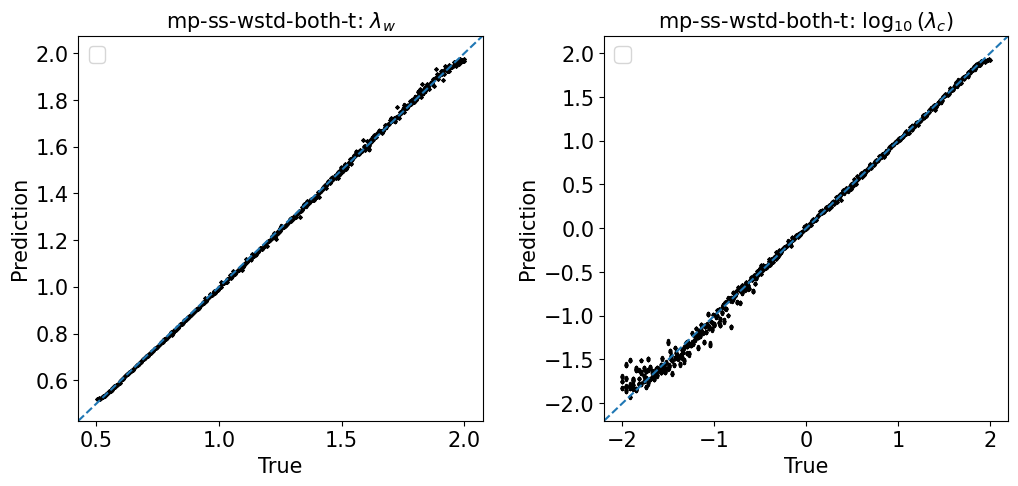

In [51]:
# Plot
train_or_test = 'test'
fig, axes = plt.subplots(1,2,figsize=(12,5))
for i in range(2):
    y_var = y_vars[i]
    ax = axes[i]
    true = y[:,i]
    for j in range(n_ens):
        pred = y_m_w_set[j,:,i]
        ax.scatter(true, pred, color='black', s=2)
    # y = r['weighted mean predict'][train_or_test][...,i]
    # std = r['weighted std predict'][train_or_test][...,i]
    # bias = r['weighted bias'][train_or_test][i]
    # ax.errorbar(x, y, std, color='black', ecolor='grey', linestyle='None', fmt='o', markersize=2, capsize=2)
    lim = ax.get_xlim()
    ax.plot(lim, lim, '--', color='tab:blue')
    ax.set(xlim=lim, ylim=lim, xlabel='True', ylabel='Prediction', title=f"{label}: {y_var}")
    ax.legend()
plt.subplots_adjust(wspace=0.3)
